# EDA

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from ast import literal_eval

from collections import defaultdict

In [2]:
def get_hashtag_counts(json):
    
    # Create empty dict where values are stored
    hashtag_count = defaultdict(int)
    
    # Iterate over all tweets, retrieve their hashtags and increment the counter by one
    for tweet in json["data"]:
        try:
            hashtags = tweet["entities"]["hashtags"]
            for hashtag in hashtags:
                hashtag_count[hashtag["tag"]] +=1
        except KeyError:
            continue
            
    return hashtag_count

def get_annotation_counts(json):
    
    annotation_count = defaultdict(int)

    for tweet in json["data"]:
        try:
            annotations = tweet["entities"]["annotations"]
            for annotation in annotations:
                annotation_count[annotation["normalized_text"]] +=1
        except KeyError:
            continue
            
    return annotation_count

In [3]:
def get_entity_count(series):
    dict_count = defaultdict(int)
    
    for entities in series:
        for entity in entities:
            if len(entity) > 0:
                dict_count[entity] += 1
            
    return dict_count

In [4]:
def get_entity_count_by_interval(df,interval,entity_type):
    entity_df = pd.DataFrame()
    
    if interval == "week":
        col_name = "year_calendar_week"
    elif interval == "month":
        col_name = "year_month"
        
    entity_type = entity_type.lower()
        
    df_sorted = df.sort_values(["created_at"])
    periods = list(df_sorted[col_name].drop_duplicates())
    
    for period in periods:
        df_sliced = df[df[col_name] == period]
        entity_count = get_entity_count(df_sliced[entity_type])
        entity_count_sorted = sorted(entity_count.items(), key=lambda x: x[1], reverse=True)
        
        entity_df[period] = pd.DataFrame(entity_count_sorted[:15]).iloc[:,0]
        
    return entity_df

In [5]:
def group_df(df,interval):
    
    if interval == "week":
        col_name = "year_calendar_week"
    elif interval == "month":
        col_name = "year_month"
    
    
    df_grouped = df.groupby([col_name])[['refugee', 'migrant', 'immigrant', 'asylum_seeker', 'other']].sum()
    df_grouped["total"] = df_grouped.sum(axis=1)
    
    return df_grouped

In [6]:
def plot_event_timeline(df, interval):
    
    df_grouped = group_df(df,interval)
    
    plt.figure(figsize=(16, 8))
    plt.plot(df_grouped["total"])
    plt.title(f"Number of tweets about refugees and related groups by {interval}")
    plt.xticks(rotation=90)
    plt.show()
    
    plt.figure(figsize=(16, 8))
    plt.plot(df_grouped["refugee"], label ="refugee")
    plt.plot(df_grouped["migrant"], label ="migrant")
    plt.plot(df_grouped["immigrant"], label ="immigrant")
    plt.plot(df_grouped["asylum_seeker"], label ="asylum seeker")
    plt.plot(df_grouped["other"], label ="other")
    plt.title(f"Grouped number of tweets about refugees and related groups by {interval}")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [144]:
def plot_entity_timeline(df, interval, entity_list, entity_type):
    
    plt.figure(figsize=(16, 8))
    
    if interval == "week":
        col_name = "year_calendar_week"
    elif interval == "month":
        col_name = "year_month"    
    
    #df_to_plot = pd.DataFrame()
    df_to_plot = pd.DataFrame(index=df[col_name].drop_duplicates().values)
    
    #for entity in entity_list:
    #    
    #    df_entity = df[df[entity_type].apply(lambda x: element_in_list(x,[entity]))]
    #    df_grouped = group_df(df_entity,interval)
    #    plt.plot(df_grouped["total"], label = entity)
    
    for entity in entity_list:
        df_entity = df[df[entity_type].apply(lambda x: element_in_list(x,[entity]))]
        df_grouped = group_df(df_entity,interval)["total"]
        df_to_plot[entity] = df_grouped
    
    plt.plot(df_to_plot)
    
    plt.xticks(rotation=90)
    plt.legend(df_to_plot.columns)
    plt.show()

In [137]:
df_tweets_beirut.index

Int64Index([2285699, 2280648, 2280533, 2280026, 2279936, 2279510, 2279214,
            2279050, 2278748, 2278663,
            ...
             981111,  980859,  980422,  980190,  979071,  978925,  978729,
             978219,  975825,  975737],
           dtype='int64', length=24237)

In [8]:
def filter_by_keywords(string, keywords):
    keywords_joined = " ".join(keywords)
    return any(word in string for word in keywords_joined)

In [9]:
def element_in_list(entities,qualifiers):

    return not(bool(set(entities).isdisjoint(set(qualifiers))))

In [10]:
# Read the tweets csv
df_tweets = pd.read_csv(r"C:\Users\jawo19ad\Dropbox (CBS)\Master thesis data\df_tweets.csv",
                        converters={"hashtags": lambda x: x.strip("[]").replace("'","").split(", "),
                                    "mentions": lambda x: x.strip("[]").replace("'","").split(", "),
                                    "annotations": lambda x: x.strip("[]").replace("'","").split(", ")})

# Drop unnecessary index column
df_tweets.drop("Unnamed: 0", axis=1, inplace=True)

# Rename columns
#df_tweets = df_tweets.rename(columns={'public_metrics.retweet_count': 'retweet_count',
#                                      'public_metrics.reply_count': 'reply_count',
#                                      'public_metrics.like_count': 'like_count',
#                                      'public_metrics.quote_count': 'quote_count'})
df_tweets.head()

,source,text,lang,id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,hashtags,mentions,annotations
0,Twitter for Android,There are too many reliable reports and first-...,en,1350390669043499013,2021-01-16T10:33:19.000Z,1327278886380515328,1,0,0,0,"[eritrea, bidentakeaction, stopwarontigray, ti...",[joebiden],[]
1,Twitter Web App,"Despite repeated requests, @Refugees and other...",en,1350390657576300544,2021-01-16T10:33:16.000Z,1323903491044188161,0,0,0,0,"[tigray, stopwarontigray, tigraygenocide, bide...","[refugees, un, joebiden]","[shimelba, hitsats]"
2,Twitter for Android,"“When the air bombing and the attacks began, I...",en,1350390643986599937,2021-01-16T10:33:13.000Z,1324130252008816640,0,0,1,0,[bidentakeaction],"[joebiden, kamalaharris, yohannesabraham]",[]
3,Twitter Web App,"""ongoing insecurity &amp; allegations of grave...",en,1350390618695020546,2021-01-16T10:33:07.000Z,1112761003,0,0,0,0,"[tigraygenocide, bidenactnow, protectrefugees]","[un, joebiden, eu_commission, refugees, josepb...",[eritrea]
4,Twitter for iPhone,"MOTHER \n\nMother, I do not cry who cries, \nm...",en,1350390607928295424,2021-01-16T10:33:04.000Z,1212824799107375105,0,1,0,0,[],[],[]


In [11]:
df_tweets["text_clean"] = df_tweets["text"].apply(lambda x: x.lower().replace("#","").replace("@",""))

In [12]:
df_tweets = df_tweets.sort_values(by="created_at")

In [13]:
df_tweets.head()

,source,text,lang,id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,hashtags,mentions,annotations,text_clean
2288193,TweetDeck,Along the miles-long Minneapolis street where ...,en,1267244468564045829,2020-06-01T00:00:00.000Z,27987151,0,0,1,0,[],[],[minneapolis],along the miles-long minneapolis street where ...
2288192,TweetDeck,"Through exhibits and initiatives, here's how @...",en,1267244469021278209,2020-06-01T00:00:00.000Z,875113940866486272,1,0,3,0,[],"[nyhistory, tenementmuseum]",[],"through exhibits and initiatives, here's how n..."
2288190,True Anthem,.@SelenaGomez surprised grads and their famili...,en,1267244475514007560,2020-06-01T00:00:01.000Z,27891216,0,0,0,0,[],[selenagomez],[],.selenagomez surprised grads and their familie...
2288191,Twitter for iPhone,@powrdragn My wife now works at a large school...,en,1267244473337229312,2020-06-01T00:00:01.000Z,99735089,0,0,0,0,[],[powrdragn],[columbus],powrdragn my wife now works at a large school ...
2288189,dlvr.it,Illegal migrants could be treated leniently if...,en,1267244478449905664,2020-06-01T00:00:02.000Z,986750503,1,0,0,0,"[trafficking, slavetrade]",[],[rob richardson],illegal migrants could be treated leniently if...


### Most frequent hashtags, mentions, and annotations

In [14]:
hashtag_count = get_entity_count(df_tweets["hashtags"])
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('refugees', 75317),
 ('tigraygenocide', 72300),
 ('tigray', 61415),
 ('covid19', 52651),
 ('s386', 38500),
 ('stopwarontigray', 33835),
 ('migrants', 33357),
 ('immigrants', 32076),
 ('ethiopia', 26012),
 ('immigration', 25445),
 ('refugee', 23878),
 ('iraqi_refugees_look_for_homeland', 23353),
 ('dv2020', 20562),
 ('dv2021', 20269),
 ('worldrefugeeday', 17910),
 ('unblocks386', 17321),
 ('refugeeswelcome', 16179),
 ('passs386', 13673),
 ('eritrea', 13287),
 ('allowaccesstotigray', 13147),
 ('immigrant', 12955),
 ('passhr1044', 12900),
 ('sudan', 12234),
 ('migration', 12084),
 ('standwithiraqirefugees', 11995)]

In [15]:
mention_count = get_entity_count(df_tweets["mentions"])
mention_count_sorted = sorted(mention_count.items(), key=lambda x: x[1], reverse=True)
mention_count_sorted[:25]

[('realdonaldtrump', 145428),
 ('refugees', 129576),
 ('joebiden', 95065),
 ('pritipatel', 84930),
 ('un', 66752),
 ('potus', 62046),
 ('nigel_farage', 60651),
 ('change', 48592),
 ('borisjohnson', 40016),
 ('kamalaharris', 36178),
 ('hrw', 31772),
 ('senatordurbin', 30059),
 ('vp', 26087),
 ('unhumanrights', 25801),
 ('senrickscott', 24826),
 ('amnesty', 24228),
 ('youtube', 23672),
 ('filippograndi', 23551),
 ('eu_commission', 23530),
 ('repzoelofgren', 22316),
 ('cnn', 22062),
 ('skynews', 21293),
 ('aoc', 20592),
 ('ukhomeoffice', 18801),
 ('abiyahmedali', 18796)]

In [16]:
annotation_count = get_entity_count(df_tweets["annotations"])
annotation_count_sorted = sorted(annotation_count.items(), key=lambda x: x[1], reverse=True)
annotation_count_sorted[:25]

[('trump', 418727),
 ('us', 224256),
 ('uk', 217712),
 ('america', 199747),
 ('biden', 156215),
 ('france', 95267),
 ('turkey', 91664),
 ('canada', 90024),
 ('europe', 89927),
 ('u.s.', 81832),
 ('india', 73542),
 ('americans', 70829),
 ('usa', 69697),
 ('obama', 63827),
 ('mexico', 56439),
 ('china', 55380),
 ('eu', 53286),
 ('germany', 52830),
 ('britain', 44080),
 ('greece', 41866),
 ('united states', 41590),
 ('democrats', 41420),
 ('australia', 39665),
 ('god', 38349),
 ('sudan', 36979)]

### Add additional date columns (Year, Month, Calendar Week, etc)

In [17]:
df_tweets["created_at"] = pd.to_datetime(df_tweets["created_at"])

In [18]:
str(df_tweets["created_at"].dt.year[0])

'2021'

In [19]:
df_tweets["year"] = df_tweets["created_at"].dt.year.astype(str)
df_tweets["calendar_week"] = df_tweets["created_at"].apply(lambda x: x.strftime("%W")) #Monday considered as first day of the week
df_tweets["year_month"] = df_tweets["year"] + "_" + df_tweets["created_at"].dt.month.astype(str)
df_tweets["year_calendar_week"] = df_tweets["year"] + "_" + df_tweets["calendar_week"]

In [20]:
df_tweets.head()

,source,text,lang,id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,hashtags,mentions,annotations,text_clean,year,calendar_week,year_month,year_calendar_week
2288193,TweetDeck,Along the miles-long Minneapolis street where ...,en,1267244468564045829,2020-06-01 00:00:00+00:00,27987151,0,0,1,0,[],[],[minneapolis],along the miles-long minneapolis street where ...,2020,22,2020_6,2020_22
2288192,TweetDeck,"Through exhibits and initiatives, here's how @...",en,1267244469021278209,2020-06-01 00:00:00+00:00,875113940866486272,1,0,3,0,[],"[nyhistory, tenementmuseum]",[],"through exhibits and initiatives, here's how n...",2020,22,2020_6,2020_22
2288190,True Anthem,.@SelenaGomez surprised grads and their famili...,en,1267244475514007560,2020-06-01 00:00:01+00:00,27891216,0,0,0,0,[],[selenagomez],[],.selenagomez surprised grads and their familie...,2020,22,2020_6,2020_22
2288191,Twitter for iPhone,@powrdragn My wife now works at a large school...,en,1267244473337229312,2020-06-01 00:00:01+00:00,99735089,0,0,0,0,[],[powrdragn],[columbus],powrdragn my wife now works at a large school ...,2020,22,2020_6,2020_22
2288189,dlvr.it,Illegal migrants could be treated leniently if...,en,1267244478449905664,2020-06-01 00:00:02+00:00,986750503,1,0,0,0,"[trafficking, slavetrade]",[],[rob richardson],illegal migrants could be treated leniently if...,2020,22,2020_6,2020_22


In [21]:
#df_tweets["refugee"] = df_tweets["text"].apply(lambda x: ("refugee" or "refugees") in x.lower().split(" "))
#df_tweets["migrant"] = df_tweets["text"].apply(lambda x: ("migrant" or "migrants") in x.lower().split(" "))
#df_tweets["immigrant"] = df_tweets["text"].apply(lambda x: ("immigrant" or "immigrants") in x.lower().split(" "))
#df_tweets["asylum_seeker"] = df_tweets["text"].apply(lambda x: ("asylum" and ("seeker" or "seekers")) in x.lower().split(" "))
#df_tweets["other"] = df_tweets["text"].apply(lambda x: (("displaced" or "stateless") and ("people" or "person" or "persons")) in x.lower().split(" "))
# -----------------
#df_tweets["refugee"] = df_tweets["text"].apply(lambda x: element_in_list(x.lower().split(" "),["refugee","refugees"]))
#df_tweets["migrant"] = df_tweets["text"].apply(lambda x: element_in_list(x.lower().split(" "),["migrant","migrants"]))
#df_tweets["immigrant"] = df_tweets["text"].apply(lambda x: element_in_list(x.lower().split(" "),["immigrant","immigrants"]))
#df_tweets["asylum_seeker"] = df_tweets["text"].apply(lambda x: element_in_list(x.lower().split(" "),["asylum"]) and  element_in_list(x.lower().split(" "),["seeker","seekers"]))
#df_tweets["other"] = df_tweets["text"].apply(lambda x: element_in_list(x.lower().split(" "),["displaced","stateless"]) and  element_in_list(x.lower().split(" "),["people","person","persons"]))

In [22]:
df_tweets["refugee"] = df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),["refugee","refugees"]))
df_tweets["migrant"] = df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),["migrant","migrants"]))
df_tweets["immigrant"] = df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),["immigrant","immigrants"]))
df_tweets["asylum_seeker"] = df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),["asylum"]) and  element_in_list(x.split(" "),["seeker","seekers"]))
df_tweets["other"] = df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),["displaced","stateless"]) and  element_in_list(x.split(" "),["people","person","persons"]))

In [23]:
check = df_tweets[(df_tweets["refugee"] == False) & (df_tweets["migrant"] == False) & (df_tweets["immigrant"] == False) & (df_tweets["asylum_seeker"] == False) & (df_tweets["other"] == False)]
check.shape
# there are still almost 2,000,000 tweets that contain neither of the keywords, this is because the keywords are heading the article to which those tweets link

(1842493, 23)

In [24]:
sum(df_tweets["refugee"]) + sum(df_tweets["migrant"]) + sum(df_tweets["immigrant"]) + sum(df_tweets["asylum_seeker"]) + sum(df_tweets["other"])

5116251

In [25]:
df_tweets.head()

,source,text,lang,id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,...,text_clean,year,calendar_week,year_month,year_calendar_week,refugee,migrant,immigrant,asylum_seeker,other
2288193,TweetDeck,Along the miles-long Minneapolis street where ...,en,1267244468564045829,2020-06-01 00:00:00+00:00,27987151,0,0,1,0,...,along the miles-long minneapolis street where ...,2020,22,2020_6,2020_22,False,True,False,False,False
2288192,TweetDeck,"Through exhibits and initiatives, here's how @...",en,1267244469021278209,2020-06-01 00:00:00+00:00,875113940866486272,1,0,3,0,...,"through exhibits and initiatives, here's how n...",2020,22,2020_6,2020_22,False,False,True,False,False
2288190,True Anthem,.@SelenaGomez surprised grads and their famili...,en,1267244475514007560,2020-06-01 00:00:01+00:00,27891216,0,0,0,0,...,.selenagomez surprised grads and their familie...,2020,22,2020_6,2020_22,False,False,False,False,False
2288191,Twitter for iPhone,@powrdragn My wife now works at a large school...,en,1267244473337229312,2020-06-01 00:00:01+00:00,99735089,0,0,0,0,...,powrdragn my wife now works at a large school ...,2020,22,2020_6,2020_22,False,False,False,False,False
2288189,dlvr.it,Illegal migrants could be treated leniently if...,en,1267244478449905664,2020-06-01 00:00:02+00:00,986750503,1,0,0,0,...,illegal migrants could be treated leniently if...,2020,22,2020_6,2020_22,False,True,False,False,False


### Frequency of Tweets over Time (also seperated by refugee/migrant/etc.)

In [26]:
df_tweets_by_week = group_df(df_tweets,"week")
df_tweets_by_week.head()

,refugee,migrant,immigrant,asylum_seeker,other,total
year_calendar_week,,,,,,
2020_22,28795,57077,72667,3795,1659,163993
2020_23,28516,42250,53033,3867,1440,129106
2020_24,66333,32267,65138,8730,3285,175753
2020_25,41702,33287,61632,14703,1557,152881
2020_26,30956,25432,56617,5417,1492,119914


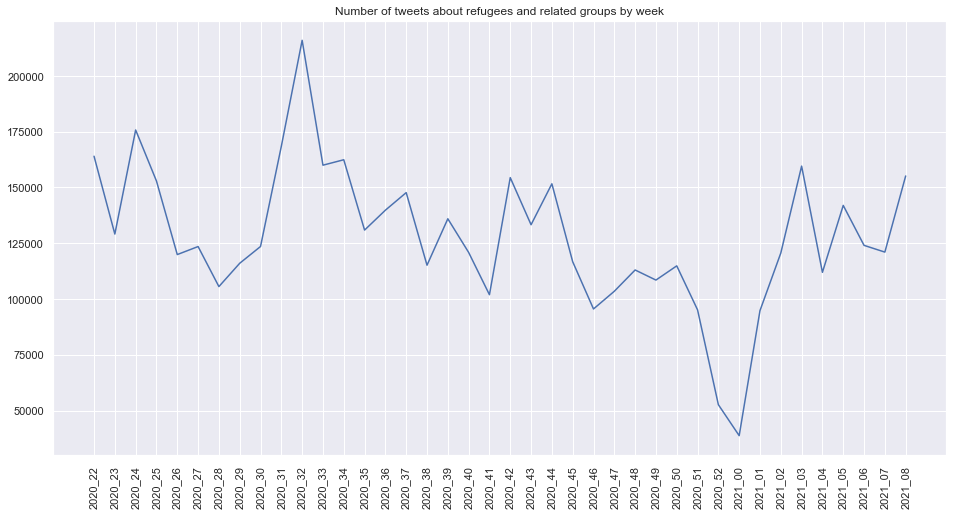

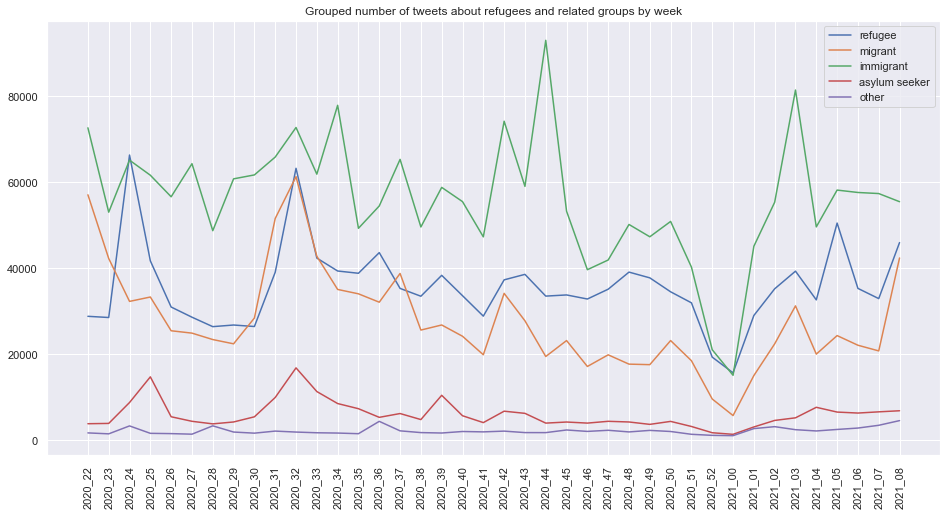

In [27]:
plot_event_timeline(df_tweets,"week")

### Most frequent entities per month

In [28]:
get_entity_count_by_interval(df_tweets[df_tweets["refugee"]],"month","hashtags")

,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12,2021_1,2021_2
0,worldrefugeeday,refugees,refugees,refugees,refugees,refugees,tigray,tigraygenocide,tigraygenocide
1,refugees,covid19,refugeeswelcome,stopicetransfers,armenia,tigray,stopwarontigray,tigray,tigray
2,covid19,refugee,refugee,iraqi_refugees_look_for_homeland,refugee,ethiopia,refugees,bidenactnow,allowaccesstotigray
3,refugeeweek2020,standwithiraqirefugees,covid19,bjp,artsakh,stopwarontigray,ethiopia,stopwarontigray,unityforethiopia
4,refugee,yemencrisis,unhcr,refugee,bjp,refugee,tigraygenocide,refugees,refugees
5,yemencrisis,rohingya,malaysia,moria,karabakhisazerbaijan,tigraygenocide,sudan,ethiopia,shameonamnesty
6,palestinianrefugees,humanrights,standwithiraqirefugees,covid19,iraqi_refugees_look_for_homeland,iraqi_refugees_look_for_homeland,protectrefugees,bidentakeaction,tplf
7,deportallrefugees,karabakhisazerbaijan,help,greece,stoparmenianaggression,stopabiy,stopabiy,eritrea,ethiopia
8,withrefugees,syria,peace,refugeeswelcome,refugeeswelcome,sudan,refugee,unscactnow,getethiopianfactsright
9,sendbackafghanrefugees,auspol,children,rohingya,dontbelievearmenia,armenia,eritrea,iraqi_refugees_look_for_homeland,tigraiopen4humanitarianassistance


In [29]:
df_hashtags_month = get_entity_count_by_interval(df_tweets,"month","hashtags")
df_hashtags_month

,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12,2021_1,2021_2
0,worldrefugeeday,s386,refugees,refugees,refugees,refugees,tigray,tigraygenocide,tigraygenocide
1,covid19,passs386,covid19,s386isfair,armenia,tigray,stopwarontigray,tigray,tigray
2,refugees,covid19,migrants,rickcantonesescott,covid19,covid19,passhr1044,stopwarontigray,allowaccesstotigray
3,migrants,durbinliesimmigrantsdie,unblocks386,covid19,artsakh,immigrants,refugees,bidenactnow,dv2020
4,refugeeweek2020,refugees,s386,s386,migrants,stopwarontigray,ethiopia,dv2021,dv2021
5,immigration,immigrants,refugeeswelcome,iraqi_refugees_look_for_homeland,immigrants,ethiopia,hr1044good4usa,dv2020,pp10014
6,blacklivesmatter,immigration,immigrantsdiewhendurbinlies,migrants,debates2020,iraqi_refugees_look_for_homeland,tigraygenocide,bidentakeaction,refugees
7,s386,unblocks386,immigrants,moria,iraqi_refugees_look_for_homeland,migrants,hr1044mustpass,ethiopia,unityforethiopia
8,immigrants,immigrantsdiewhendurbinlies,durbinfightsoutsourcerslie,stopicetransfers,immigration,tigraygenocide,keepyourpromise,refugees,tplf
9,refugee,migrants,webackdurbin,unblocks386,refugee,immigration,sudan,noban,ethiopia


In [30]:
df_mentions_month = get_entity_count_by_interval(df_tweets,"month","mentions")
df_mentions_month

,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12,2021_1,2021_2
0,change,realdonaldtrump,pritipatel,realdonaldtrump,realdonaldtrump,realdonaldtrump,refugees,joebiden,potus
1,realdonaldtrump,senatordurbin,nigel_farage,senrickscott,joebiden,refugees,repzoelofgren,refugees,refugees
2,refugees,dnc,realdonaldtrump,pritipatel,refugees,joebiden,un,un,vp
3,nigel_farage,dncwarroom,borisjohnson,garylineker,pritipatel,pritipatel,senmikelee,kamalaharris,un
4,pritipatel,refugees,skynews,refugees,laurenwitzkede,kamalaharris,realdonaldtrump,potus,secblinken
5,sonusood,nigel_farage,refugees,nigel_farage,flotus,un,hrw,ablinken,amnesty
6,senatordurbin,pritipatel,joebiden,chrishartline,un,hrw,unocha,lindat_g,joebiden
7,narendramodi,change,bettemidler,borisjohnson,senrickscott,unhumanrights,joebiden,pritipatel,eu_commission
8,borisjohnson,joebiden,senatordurbin,joebiden,youtube,borisjohnson,filippograndi,vp,hrw
9,joebiden,iamjohnoliver,benandjerrysuk,change,borisjohnson,abiyahmedali,abiyahmedali,unhumanrights,alimayorkas


In [31]:
df_annotations_month = get_entity_count_by_interval(df_tweets,"month","annotations")
df_annotations_month

,2020_6,2020_7,2020_8,2020_9,2020_10,2020_11,2020_12,2021_1,2021_2
0,trump,trump,uk,trump,trump,trump,trump,trump,biden
1,us,us,trump,uk,us,us,us,biden,trump
2,america,america,france,us,america,america,uk,us,us
3,uk,uk,us,america,uk,biden,america,america,america
4,india,canada,america,europe,biden,uk,sudan,uk,uk
5,turkey,turkey,europe,greece,france,europe,turkey,tigray,mexico
6,canada,u.s.,britain,turkey,u.s.,canada,canada,americans,u.s.
7,europe,usa,eu,france,obama,obama,germany,turkey,tigray
8,u.s.,india,turkey,canada,canada,turkey,ethiopia,u.s.,ethiopia
9,supreme court,americans,canada,eu,europe,sudan,biden,usa,texas


### Most frequent entities per week

In [32]:
df_hashtags_week = get_entity_count_by_interval(df_tweets,"week","hashtags")
df_hashtags_week

,2020_22,2020_23,2020_24,2020_25,2020_26,2020_27,2020_28,2020_29,2020_30,2020_31,...,2020_52,2021_00,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06,2021_07,2021_08
0,covid19,covid19,worldrefugeeday,deportallrefugees,covid19,covid19,covid19,s386,immigrantsdiewhendurbinlies,covid19,...,stopwarontigray,tigraygenocide,tigraygenocide,tigraygenocide,tigraygenocide,tigraygenocide,tigraygenocide,tigraygenocide,tigraygenocide,shameonamnesty
1,blacklivesmatter,refugees,refugees,sendbackafghanrefugees,refugees,refugees,karabakhisazerbaijan,passs386,unblocks386,refugees,...,tigraygenocide,tigray,tigray,tigray,bidenactnow,dv2020,tigray,dv2020,tigray,tigraygenocide
2,migrants,migrants,refugeeweek2020,covid19,s386,immigration,refugees,durbinliesimmigrantsdie,s386,migrants,...,tigray,stopwarontigray,stopwarontigray,bidentakeaction,tigray,dv2021,allowaccesstotigray,allowaccesstotigray,dv2021,unityforethiopia
3,refugees,blacklivesmatter,covid19,refugees,yemencrisis,immigrants,humanrights,covid19,durbinfightsoutsourcerslie,s386,...,ethiopia,ethiopia,ethiopia,dv2021,unscactnow,bidenactnow,dv2020,dv2021,dv2020,tplf
4,migrantworkers,immigration,palestinianrefugees,immigration,immigration,s386,osce,refugees,webackdurbin,refugeeswelcome,...,refugees,dv2021,refugees,dv2020,bidentakeaction,refugees,ethiopia,pp10014,pp10014,tigray
5,coronavirus,s386,daca,s386,immigrants,india,stoparmenianoccupation,immigration,covid19,immigrants,...,stopabiy,djibouti,iraqi_refugees_look_for_homeland,bidenactnow,refugees,tigray,pp10014,tigray,allowaccesstotigray,amnestyusedtplfsources
6,immigration,coronavirus,withrefugees,immigrants,migrants,migrants,immigration,immigrants,refugees,webackdurbin,...,opentigray,blm,eritrea,noban,eritreaoutoftigray,iraqi_refugees_look_for_homeland,dv2021,refugees,refugees,refugees
7,migration,migration,yemencrisis,migrants,migration,migration,stoparmenianaggression,trump,passs386,durbinfightsoutsourcerslie,...,warontigray,ethiopian,sudan,stopwarontigray,dv2020,trudeauactnow,tigraiopen4humanitarianassistance,100daysofgenocide,savediversityvisa,tplfisthecause
8,immigrants,immigrants,refugeeweek,standwithiraqirefugees,deportallrefugeesfromsindh,mignation,immigrants,migration,immigrants,immigration,...,eritrea,refugees,blm,familyvisa,iraqi_refugees_look_for_homeland,stopwarontigray,uplifttigraiethiopia,tigraycantwait,getethiopianfactsright,getethiopianfactsright
9,s386,patientsnotpassports,worldrefugeeday2020,migration,refugee,refugee,migrants,freethemall,migrants,immigrationnation,...,blm,iraqi_refugees_look_for_homeland,famine,refugees,ethiopia,pp10014,unscactnow,immigrants,drabiygovistryinghard,tigrayfacts


In [33]:
df_mentions_week = get_entity_count_by_interval(df_tweets,"week","mentions")
df_mentions_week

,2020_22,2020_23,2020_24,2020_25,2020_26,2020_27,2020_28,2020_29,2020_30,2020_31,...,2020_52,2021_00,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06,2021_07,2021_08
0,change,change,refugees,realdonaldtrump,realdonaldtrump,realdonaldtrump,realdonaldtrump,senatordurbin,senatordurbin,pritipatel,...,refugees,un,un,joebiden,joebiden,potus,potus,potus,potus,refugees
1,realdonaldtrump,realdonaldtrump,realdonaldtrump,nigel_farage,change,change,nigel_farage,dnc,iamjohnoliver,nigel_farage,...,un,refugees,refugees,un,kamalaharris,vp,vp,refugees,refugees,amnesty
2,sonusood,refugees,change,refugees,refugees,goyafoods,refugees,dncwarroom,dnc,borisjohnson,...,hrw,nowthisnews,unhumanrights,refugees,potus,joebiden,refugees,un,secblinken,potus
3,refugees,pritipatel,marcomendicino,pritipatel,pritipatel,refugees,pritipatel,realdonaldtrump,nigel_farage,realdonaldtrump,...,nigel_farage,abiyahmedali,hrw,ablinken,refugees,pritipatel,un,hrw,vp,eu_commission
4,ukchange,sonusood,un,borisjohnson,joebiden,joebiden,senatordurbin,pritipatel,realdonaldtrump,skynews,...,realdonaldtrump,joebiden,realdonaldtrump,kamalaharris,lindat_g,refugees,secblinken,secblinken,joebiden,statedept
5,nigel_farage,narendramodi,joebiden,change,marcomendicino,senatordurbin,youtube,refugees,dickdurbin,mouthwaite,...,joebiden,unhumanrights,usun,lindat_g,ablinken,secblinken,justintrudeau,vp,un,voaamharic
6,pritipatel,amitshah,senatordurbin,skynews,senatordurbin,ilhanmn,joebiden,joebiden,pritipatel,change,...,unhumanrights,7piliers,joebiden,alimayorkas,un,whitehouse,joebiden,eu_commission,alimayorkas,marcgarneau
7,narendramodi,senatordurbin,pritipatel,senatordurbin,conservatives,pritipatel,aoc,borisjohnson,borisjohnson,bbcnews,...,kamalaharris,unesco,abiyahmedali,travelgov,pmtunisia,ablinken,amnesty,joebiden,hrw,vp
8,pmoindia,borisjohnson,borisjohnson,joebiden,whitehouse,whitehouse,ilhanmn,nigel_farage,sonusood,senatordurbin,...,toryboypierce,hrw,antonioguterres,ailanational,gopleader,presssec,unhumanrights,alimayorkas,cnn,nigel_farage
9,cdnchange,rahulgandhi,narendramodi,nytimes,uklabour,un,thehill,txcivilrights,refugees,lbc,...,abiyahmedali,nigel_farage,wfpchief,filippograndi,vp,un,alimayorkas,amnesty,filippograndi,un


In [34]:
df_annotations_week = get_entity_count_by_interval(df_tweets,"week","annotations")
df_annotations_week

,2020_22,2020_23,2020_24,2020_25,2020_26,2020_27,2020_28,2020_29,2020_30,2020_31,...,2020_52,2021_00,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06,2021_07,2021_08
0,trump,trump,trump,trump,trump,trump,trump,trump,trump,uk,...,uk,sudan,trump,trump,biden,biden,biden,biden,biden,biden
1,india,america,supreme court,us,america,america,us,us,us,france,...,trump,tigray,america,biden,trump,trump,trump,us,us,trump
2,america,us,turkey,uk,us,us,america,america,uk,trump,...,us,trump,us,us,us,us,us,trump,america,us
3,us,india,us,america,uk,united states,uk,canada,america,us,...,america,uk,uk,america,america,uk,america,america,trump,uk
4,uk,uk,america,u.s.,canada,turkey,turkey,uk,usa,lebanon,...,brexit day,us,biden,uk,americans,america,tigray,mexico,mexico,america
5,canada,turkey,uk,turkey,turkey,uk,canada,usa,france,america,...,stewart lee,ethiopia,turkey,tigray,u.s.,turkey,eritrea,uk,texas,ethiopia
6,europe,canada,world refugee day,glasgow,americans,u.s.,u.s.,u.s.,canada,eu,...,kent refugees,america,canada,ethiopia,joe biden,europe,ethiopia,u.s.,uk,tigray
7,turkey,europe,india,india,india,canada,europe,turkey,europe,britain,...,canada,turkey,sudan,guatemala,uk,u.s.,uk,usa,u.s.,u.s.
8,usa,u.s.,canada,sindh,europe,americans,india,india,india,europe,...,twitter,um rakuba,tigray,eritrea,usa,napier barracks,u.s.,americans,turkey,europe
9,delhi,bjp,daca,canada,china,usa,americans,europe,u.s.,brexit,...,tigray,djibouti,usa,usa,mexico,canada,sudan,turkey,americans,qatar


## Identification of Events

### s386

#### Find all relevant hashtags

In [35]:
s386_hashtags_1 = ["s386","passs386","unblocks386","s386isfair"]

In [36]:
df_tweets_s386_1 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,s386_hashtags_1))]
df_tweets_s386_1.shape

(50324, 23)

In [37]:
hashtag_count = get_entity_count(df_tweets_s386_1["hashtags"])

# Remove hashtags that are already in list
for hashtag in s386_hashtags_1:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('durbinliesimmigrantsdie', 8369),
 ('immigrantsdiewhendurbinlies', 8260),
 ('rickcantonesescott', 6373),
 ('rickbeijingscott', 6153),
 ('s386isgoodforamerica', 1825),
 ('nos386', 1743),
 ('hr1044', 1690),
 ('yess386', 1468),
 ('s386eliminatesdiscrimination', 1155),
 ('immigrants', 1052),
 ('gcbacklog', 994),
 ('homeishere', 856),
 ('fairness', 826),
 ('neverforget', 744),
 ('dirtypolitics', 743),
 ('disappointed', 742),
 ('passhr1044', 731),
 ('s386isnotfair', 648),
 ('senatemustpasss386', 584),
 ('standwithscott', 521),
 ('rosettarick', 498),
 ('ilpol', 477),
 ('nos386noharassment', 454),
 ('s386blockedflprotected', 449),
 ('s386outsourcingbill', 444)]

In [38]:
s386_hashtags_2 = s386_hashtags_1 + ["durbinliesimmigrantsdie","immigrantsdiewhendurbinlies","rickcantonesescott",
                                     "rickbeijingscott","s386isgoodforamerica","nos386","hr1044","yess386",
                                     "s386eliminatesdiscrimination","gcbacklog","passhr1044","s386isnotfair",
                                     "senatemustpasss386","standwithscott","nos386noharassment","s386blockedflprotected",
                                     "s386outsourcingbill"]

In [39]:
df_tweets_s386_2 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,s386_hashtags_2))]
df_tweets_s386_2.shape

(70389, 23)

In [40]:
hashtag_count = get_entity_count(df_tweets_s386_2["hashtags"])

# Remove hashtags that are already in list
for hashtag in s386_hashtags_2:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('hr1044good4usa', 8608),
 ('immigrants', 1286),
 ('webackdurbin', 1155),
 ('durbinfightsoutsourcerslie', 978),
 ('imwithdurbin', 904),
 ('homeishere', 870),
 ('fairness', 836),
 ('standwithdurbin', 807),
 ('neverforget', 744),
 ('dirtypolitics', 743),
 ('disappointed', 742),
 ('stophr1044', 529),
 ('academichalt', 511),
 ('h4kids', 503),
 ('rosettarick', 498),
 ('housebanschinese', 483),
 ('ilpol', 480),
 ('stops386', 457),
 ('checks4techs', 411),
 ('equality', 409),
 ('daca', 398),
 ('uniplung', 397),
 ('h1b', 396),
 ('h4eaddelays', 326),
 ('racist', 314)]

In [41]:
s386_hashtags_3 = s386_hashtags_2 + ["hr1044good4usa", "webackdurbin", "durbinfightsoutsourcerslie", "imwithdurbin",
                                     "standwithdurbin", "stophr1044", "academichalt","rosettarick","housebanschinese",
                                     "stops386", "checks4techs"]

In [42]:
df_tweets_s386_3 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,s386_hashtags_3))]
df_tweets_s386_3.shape

(74954, 23)

In [43]:
s386_hashtag_qualifier = s386_hashtags_3

In [44]:
s386_hashtag_qualifier

['s386',
 'passs386',
 'unblocks386',
 's386isfair',
 'durbinliesimmigrantsdie',
 'immigrantsdiewhendurbinlies',
 'rickcantonesescott',
 'rickbeijingscott',
 's386isgoodforamerica',
 'nos386',
 'hr1044',
 'yess386',
 's386eliminatesdiscrimination',
 'gcbacklog',
 'passhr1044',
 's386isnotfair',
 'senatemustpasss386',
 'standwithscott',
 'nos386noharassment',
 's386blockedflprotected',
 's386outsourcingbill',
 'hr1044good4usa',
 'webackdurbin',
 'durbinfightsoutsourcerslie',
 'imwithdurbin',
 'standwithdurbin',
 'stophr1044',
 'academichalt',
 'rosettarick',
 'housebanschinese',
 'stops386',
 'checks4techs']

#### Create event qualifier

In [45]:
annotation_count = get_entity_count(df_tweets_s386_3["annotations"])

# Sort hashtags by frequency
annotation_count_sorted = sorted(annotation_count.items(), key=lambda x: x[1], reverse=True)
annotation_count_sorted[:40]

[('america', 5773),
 ('us', 5760),
 ('usa', 5513),
 ('india', 2253),
 ('congress', 961),
 ('china', 879),
 ('daca', 874),
 ('indians', 750),
 ('durbin', 728),
 ('senator durbin', 713),
 ('us congress', 685),
 ('civilrightsact', 665),
 ('richard russell', 664),
 ('americans', 456),
 ('u.s.', 449),
 ('nǐ hǎo', 421),
 ('texas', 404),
 ('africa', 385),
 ('trump', 325),
 ('ms. hegar', 324),
 ('sen. durbin', 292),
 ('sen. rick scott', 287),
 ('mike lee', 279),
 ('florida', 251),
 ('dol', 242),
 ('john lewis', 227),
 ('god', 208),
 ('united', 204),
 ('senator cornyn', 194),
 ('united states', 184),
 ('rick scott', 179),
 ('sen durbin', 163),
 ('democrats', 158),
 ('bill', 156),
 ('south america', 153),
 ('senate', 152),
 ('dick durbin', 148),
 ('american hospital association', 124),
 ('biden', 113),
 ('us-born', 111)]

In [46]:
mention_count = get_entity_count(df_tweets_s386_3["mentions"])

# Sort hashtags by frequency
mention_count_sorted = sorted(mention_count.items(), key=lambda x: x[1], reverse=True)
mention_count_sorted[:40]

[('senatordurbin', 24915),
 ('senrickscott', 21967),
 ('senmikelee', 15335),
 ('repzoelofgren', 13994),
 ('dnc', 13476),
 ('dncwarroom', 7811),
 ('chrishartline', 6746),
 ('iamjohnoliver', 5944),
 ('dickdurbin', 5556),
 ('senatedems', 4355),
 ('joebiden', 2774),
 ('realdonaldtrump', 2666),
 ('senategop', 2364),
 ('scottforflorida', 2174),
 ('kamalaharris', 1704),
 ('speakerpelosi', 1428),
 ('ailanational', 1127),
 ('housedemocrats', 1125),
 ('cnn', 1042),
 ('potus', 815),
 ('housegop', 770),
 ('gcbcoalition', 721),
 ('immivoice', 721),
 ('senschumer', 712),
 ('jaredkushner', 624),
 ('alimayorkas', 493),
 ('foxnews', 476),
 ('uscis', 465),
 ('whitehouse', 441),
 ('mitindc', 423),
 ('vp', 418),
 ('housejudiciary', 411),
 ('johncornyn', 399),
 ('tim_cook', 390),
 ('gop', 379),
 ('ckuck', 370),
 ('miamiherald', 355),
 ('nicolasmaduro', 353),
 ('aauniversities', 341),
 ('mjhegar', 338)]

In [47]:
s386_event_qualifier = ["s386","durbin","hr1044", "scott"]

#### Create event dataset

In [48]:
s386_qualifier = set(s386_event_qualifier + s386_hashtag_qualifier)

In [49]:
df_tweets_s386 = df_tweets[df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),s386_qualifier))]

In [50]:
df_tweets_s386.shape

(62503, 23)

#### Visualize event

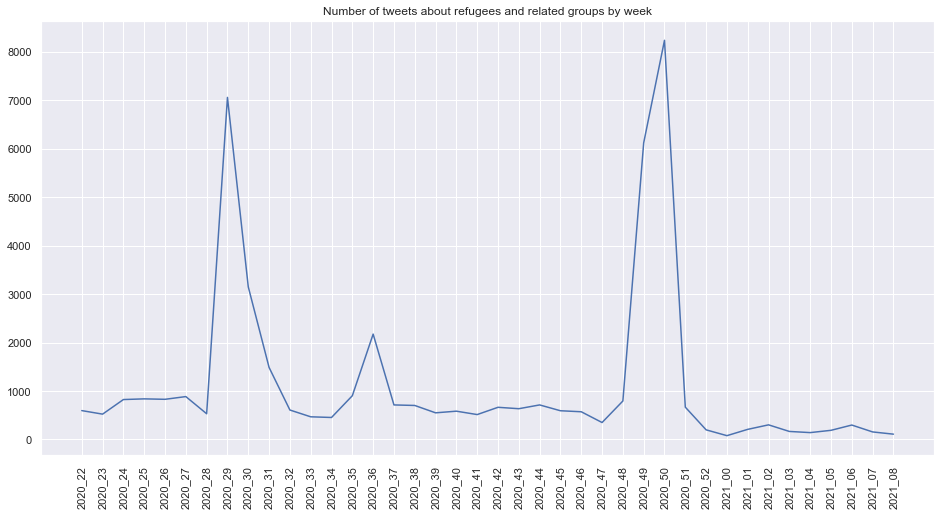

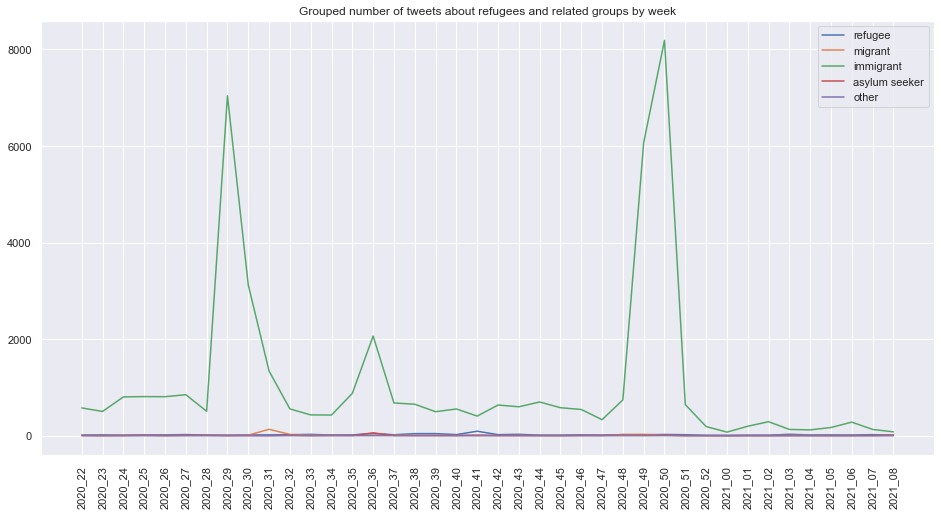

In [51]:
plot_event_timeline(df_tweets_s386,"week")

### Moria

#### Find all relevant hashtags

In [52]:
moria_hashtags_1 = ["moria", "greece"]

In [53]:
df_tweets_moria_1 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,moria_hashtags_1))]
df_tweets_moria_1.shape

(12351, 23)

In [54]:
hashtag_count = get_entity_count(df_tweets_moria_1["hashtags"])

# Remove hashtags that are already in list
for hashtag in moria_hashtags_1:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('refugees', 2582),
 ('migrants', 1117),
 ('lesbos', 1110),
 ('turkey', 1066),
 ('eu', 914),
 ('lesvos', 891),
 ('news', 717),
 ('refugeesgr', 598),
 ('refugee', 576),
 ('leavenoonebehind', 540),
 ('moriacamp', 510),
 ('refugeeswelcome', 504),
 ('covid19', 491),
 ('europe', 487),
 ('fire', 450),
 ('germany', 357),
 ('migration', 314),
 ('humanrights', 302),
 ('greek', 283),
 ('coronavirus', 264),
 ('mitsotakis', 261),
 ('asylum', 245),
 ('asylumseekers', 241),
 ('karatepe', 224),
 ('migrant', 196)]

In [55]:
moria_hashtags_2 = moria_hashtags_1 + ["lesbos","lesvos","refugeesgr","moriacamp","fire","greek","mitsotakis","karatepe"]

In [56]:
df_tweets_moria_2 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,moria_hashtags_2))]
df_tweets_moria_2.shape

(16019, 23)

In [57]:
hashtag_count = get_entity_count(df_tweets_moria_2["hashtags"])

# Remove hashtags that are already in list
for hashtag in moria_hashtags_2:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('refugees', 3299),
 ('migrants', 1399),
 ('turkey', 1155),
 ('eu', 1044),
 ('refugee', 794),
 ('news', 730),
 ('leavenoonebehind', 634),
 ('refugeeswelcome', 588),
 ('covid19', 573),
 ('europe', 561),
 ('germany', 402),
 ('migration', 389),
 ('humanrights', 380),
 ('asylum', 324),
 ('coronavirus', 313),
 ('asylumseekers', 295),
 ('migrant', 269),
 ('athens', 242),
 ('immigrants', 220),
 ('samos', 203),
 ('syria', 202),
 ('moria2', 191),
 ('pushbacks', 183),
 ('turkish', 152),
 ('freethekids', 142)]

In [58]:
moria_hashtags_3 = moria_hashtags_2 + ["moria2"]

In [59]:
df_tweets_moria_3 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,moria_hashtags_3))]
df_tweets_moria_3.shape

(16122, 23)

In [60]:
moria_hashtag_qualifier = moria_hashtags_3

#### Create event qualifier

In [61]:
annotation_count = get_entity_count(df_tweets_moria_3["annotations"])

# Sort hashtags by frequency
annotation_count_sorted = sorted(annotation_count.items(), key=lambda x: x[1], reverse=True)
annotation_count_sorted[:40]

[('greece', 2403),
 ('europe', 905),
 ('moria', 764),
 ('lesbos', 751),
 ('eu', 521),
 ('turkey', 489),
 ('lesvos', 374),
 ('germany', 321),
 ('prime minister', 253),
 ('athens', 195),
 ('kara tepe', 138),
 ('syria', 118),
 ('uk', 97),
 ('aegean', 66),
 ('amazon', 63),
 ('berlin', 62),
 ('erdogan', 61),
 ('france', 59),
 ('afghanistan', 59),
 ('turkish', 58),
 ('chios', 55),
 ('samos', 52),
 ('aegean sea', 52),
 ('unhcr', 43),
 ('moria camp', 39),
 ('italy', 38),
 ('mytilene', 36),
 ('us', 35),
 ('cyprus', 35),
 ('ireland', 34),
 ('moria refugee camp', 33),
 ('turkish coast guard', 32),
 ('greek', 32),
 ('netherlands', 31),
 ('covid', 30),
 ('merkel', 30),
 ('brussels', 29),
 ('frontex', 27),
 ('mediterranean', 26),
 ('ngo', 25)]

In [62]:
mention_count = get_entity_count(df_tweets_moria_3["mentions"])

# Sort hashtags by frequency
mention_count_sorted = sorted(mention_count.items(), key=lambda x: x[1], reverse=True)
mention_count_sorted[:40]

[('primeministergr', 574),
 ('refugees', 384),
 ('euhomeaffairs', 288),
 ('eu_commission', 272),
 ('bmi_bund', 251),
 ('ukhomeoffice', 241),
 ('nmitarakis', 240),
 ('ministeriejenv', 238),
 ('interieur_gouv', 228),
 ('hrw', 203),
 ('vonderleyen', 158),
 ('ylvajohansson', 132),
 ('unhcrgreece', 115),
 ('nytimes', 105),
 ('kmitsotakis', 103),
 ('un', 86),
 ('frontex', 73),
 ('msf', 66),
 ('europarl_en', 61),
 ('amnesty', 60),
 ('unmigration', 50),
 ('f_grillmeier', 49),
 ('dwnews', 49),
 ('msf_sea', 48),
 ('guardian', 48),
 ('eucopresident', 48),
 ('emmanuelmacron', 47),
 ('margschinas', 47),
 ('amnestyireland', 47),
 ('bbcworld', 44),
 ('hcoastguard', 43),
 ('rspaegean', 42),
 ('unhumanrights', 40),
 ('youtube', 40),
 ('katymfallon', 39),
 ('bbcnews', 38),
 ('chooselove', 38),
 ('eva_cosse', 37),
 ('eucouncil', 36),
 ('ajenglish', 36)]

In [63]:
moria_event_qualifier = []

#### Create event dataset

In [64]:
moria_qualifier = set(moria_event_qualifier + moria_hashtag_qualifier)

In [65]:
df_tweets_moria = df_tweets[df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),moria_qualifier))]

In [66]:
moria_qualifier

{'fire',
 'greece',
 'greek',
 'karatepe',
 'lesbos',
 'lesvos',
 'mitsotakis',
 'moria',
 'moria2',
 'moriacamp',
 'refugeesgr'}

In [67]:
df_tweets_moria.shape

(87710, 23)

#### Visualize event

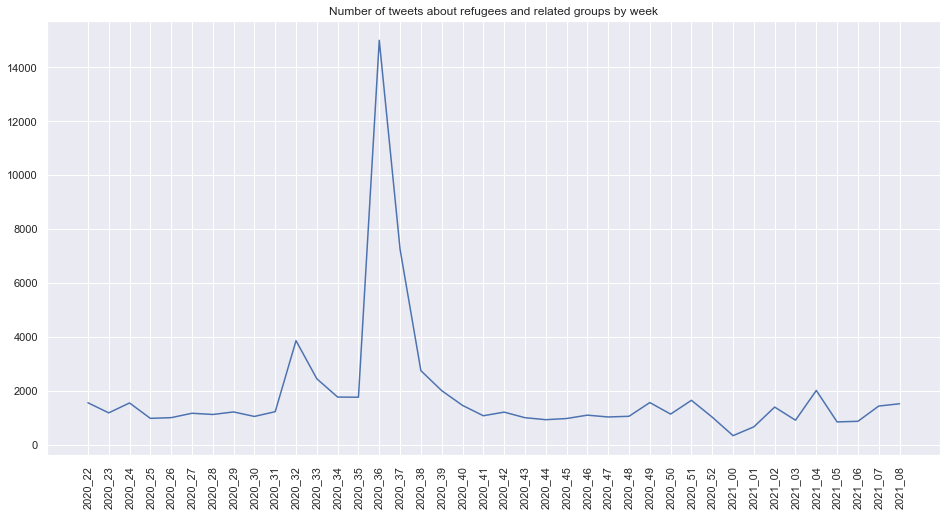

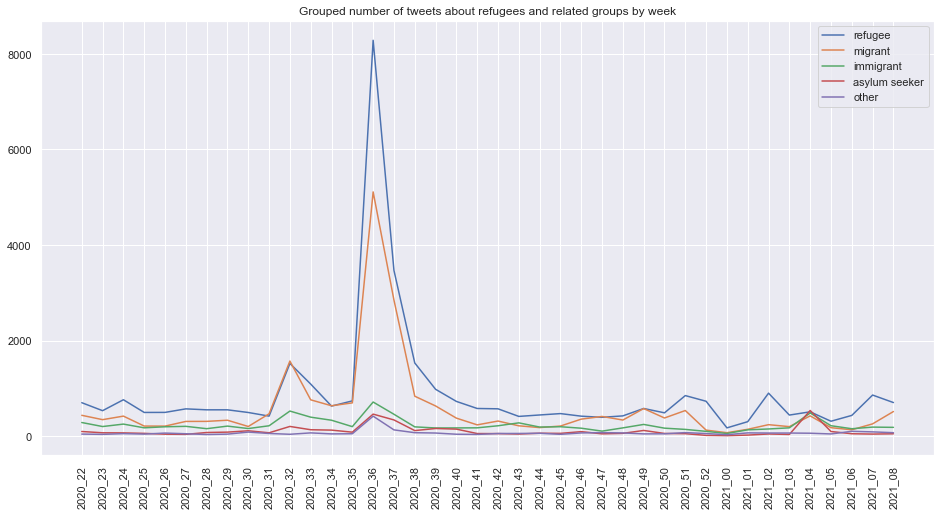

In [68]:
plot_event_timeline(df_tweets_moria,"week")

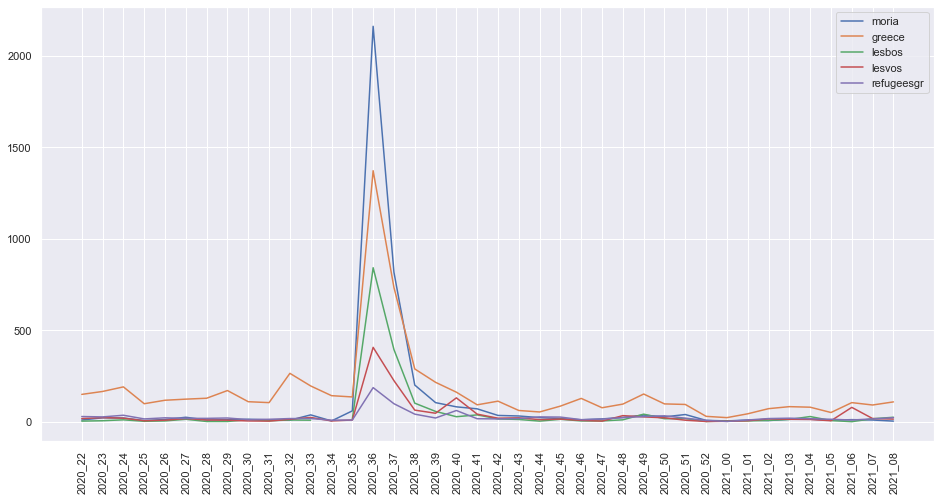

,moria,greece,lesbos,lesvos,refugeesgr
2020_22,10,150,4.0,18,29
2020_23,22,166,6.0,23,27
2020_24,21,191,11.0,20,36
2020_25,7,99,3.0,6,16
2020_26,13,118,5.0,9,22
2020_27,25,124,14.0,18,19
2020_28,10,129,2.0,10,19
2020_29,12,171,2.0,9,21
2020_30,14,110,12.0,5,12
2020_31,11,105,6.0,4,14


In [143]:
plot_entity_timeline(df_tweets_moria, "week", moria_hashtags_3[:5], "hashtags")

### Tigray

#### Find all relevant hashtags

In [70]:
tigray_hashtags_1 = ["tigraygenocide","tigray","allowaccesstotigray","tigrayfacts","stopwarontigray","eritreaoutoftigray"]

In [71]:
df_tweets_tigray_1 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,tigray_hashtags_1))]
df_tweets_tigray_1.shape

(111961, 23)

In [72]:
hashtag_count = get_entity_count(df_tweets_tigray_1["hashtags"])

# Remove hashtags that are already in list
for hashtag in tigray_hashtags_1:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('ethiopia', 18394),
 ('bidenactnow', 11036),
 ('eritrea', 10724),
 ('sudan', 8727),
 ('stopabiy', 6966),
 ('bidentakeaction', 6437),
 ('protectrefugees', 5722),
 ('unscactnow', 5606),
 ('refugees', 5010),
 ('trudeauactnow', 3849),
 ('warontigray', 3375),
 ('getethiopianfactsright', 3202),
 ('tigraycantwait', 2969),
 ('unsc', 2666),
 ('eritrean', 2573),
 ('war', 2554),
 ('humanitariancorridor', 2429),
 ('tigraiopen4humanitarianassistance', 2401),
 ('uplifttigraiethiopia', 2385),
 ('stoptheliehelptigrai', 2308),
 ('isaias', 2218),
 ('blm', 2168),
 ('famine', 1860),
 ('r2ptigray', 1766),
 ('tplfisthecause', 1683)]

In [73]:
tigray_hashtags_2 = tigray_hashtags_1 + ["ethiopia","eritrea","stopabiy","warontigray","getethiopianfactsright",
                                         "tigraycantwait","tigraiopen4humanitarianassistance","eritrean",
                                         "uplifttigraiethiopia","stoptheliehelptigrai","r2ptigray"]

In [74]:
df_tweets_tigray_2 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,tigray_hashtags_2))]
df_tweets_tigray_2.shape

(123498, 23)

In [75]:
hashtag_count = get_entity_count(df_tweets_tigray_2["hashtags"])

# Remove hashtags that are already in list
for hashtag in tigray_hashtags_2:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('bidenactnow', 11045),
 ('sudan', 9723),
 ('unscactnow', 6487),
 ('bidentakeaction', 6463),
 ('protectrefugees', 5735),
 ('refugees', 5630),
 ('trudeauactnow', 3854),
 ('tplf', 3565),
 ('unsc', 2708),
 ('war', 2580),
 ('unityforethiopia', 2489),
 ('humanitariancorridor', 2442),
 ('isaias', 2231),
 ('blm', 2175),
 ('tplfisthecause', 1996),
 ('ethiopian', 1971),
 ('famine', 1861),
 ('refugee', 1638),
 ('reconnecttigray', 1610),
 ('drabiygovistryinghard', 1599),
 ('un', 1431),
 ('abiymustgo', 1387),
 ('r2p', 1356),
 ('unhcr', 1344),
 ('100daysofgenocide', 1337)]

In [76]:
tigray_hashtags_3 = tigray_hashtags_2 + ["unityforethiopia","tplfisthecause","ethiopian","reconnecttigray",
                                         "drabiygovistryinghard","abiymustgo"]

In [77]:
df_tweets_tigray_3 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,tigray_hashtags_3))]
df_tweets_tigray_3.shape

(129913, 23)

In [78]:
tigray_hashtag_qualifier = tigray_hashtags_3

#### Create event qualifier

In [79]:
annotation_count = get_entity_count(df_tweets_tigray_3["annotations"])

# Sort hashtags by frequency
annotation_count_sorted = sorted(annotation_count.items(), key=lambda x: x[1], reverse=True)
annotation_count_sorted[:40]

[('tigray', 19172),
 ('ethiopia', 17123),
 ('sudan', 16500),
 ('eritrea', 13197),
 ('shimelba', 3608),
 ('hitsats', 3307),
 ('eritrean', 1861),
 ('shire', 1622),
 ('abiy', 1598),
 ('tigray refugee camps', 1510),
 ('djibouti', 1244),
 ('un', 1181),
 ('tigrayans', 1024),
 ('isaias afewerki', 951),
 ('ethiopian', 844),
 ('um rakuba', 843),
 ('mai kadra', 726),
 ('united nations', 712),
 ('hamdayet', 705),
 ('abiy ahmed', 703),
 ('um raquba', 678),
 ('filippo grandi', 640),
 ('fano', 639),
 ('us', 600),
 ('daniel yemane', 589),
 ('reuters', 562),
 ('neighbouring sudan', 552),
 ('muslims', 512),
 ('al nejashi', 501),
 ('u.n.', 490),
 ('europe', 462),
 ('bahti adal', 442),
 ('africa', 441),
 ('kenya', 406),
 ('ethiopians', 383),
 ('nairobi', 381),
 ('eu', 369),
 ('ebrahim', 348),
 ('isayas afeworki', 347),
 ('unhcr', 344)]

In [80]:
mention_count = get_entity_count(df_tweets_tigray_3["mentions"])

# Sort hashtags by frequency
mention_count_sorted = sorted(mention_count.items(), key=lambda x: x[1], reverse=True)
mention_count_sorted[:40]

[('un', 37368),
 ('refugees', 36988),
 ('hrw', 17741),
 ('joebiden', 14482),
 ('eu_commission', 13885),
 ('abiyahmedali', 13599),
 ('amnesty', 13557),
 ('unhumanrights', 12643),
 ('potus', 11981),
 ('filippograndi', 11878),
 ('lindat_g', 11259),
 ('unocha', 8747),
 ('ablinken', 8734),
 ('usun', 8500),
 ('vp', 7777),
 ('unreliefchief', 7279),
 ('antonioguterres', 7049),
 ('secblinken', 5950),
 ('unhcrethiopia', 5494),
 ('statedept', 5339),
 ('marcgarneau', 5240),
 ('justintrudeau', 4876),
 ('kamalaharris', 4673),
 ('kenroth', 4473),
 ('janezlenarcic', 4462),
 ('eu_echo', 4292),
 ('josepborrellf', 4258),
 ('ambassadorrice', 4029),
 ('intlcrimcourt', 3735),
 ('voaamharic', 3535),
 ('wfp', 3500),
 ('ukun_newyork', 2974),
 ('wfpchief', 2853),
 ('unhcr', 2796),
 ('pmtunisia', 2781),
 ('jakejsullivan', 2713),
 ('estoniaun', 2707),
 ('mbachelet', 2498),
 ('franceonu', 2368),
 ('voanews', 2266)]

In [81]:
tigray_event_qualifier = ["shimelba","hitsats","tigrayans","rakuba","raquba","mai kadra","hamdayet","fano"]

#### Create event dataset

In [82]:
tigray_qualifier = set(tigray_event_qualifier + tigray_hashtag_qualifier)

In [83]:
df_tweets_tigray = df_tweets[df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),tigray_qualifier))]

In [84]:
df_tweets_tigray.shape

(154870, 23)

#### Visualize event

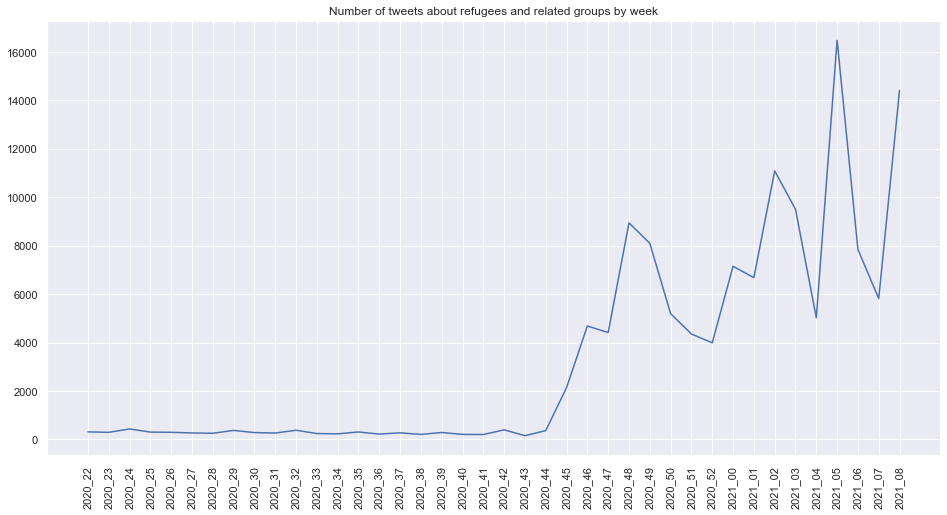

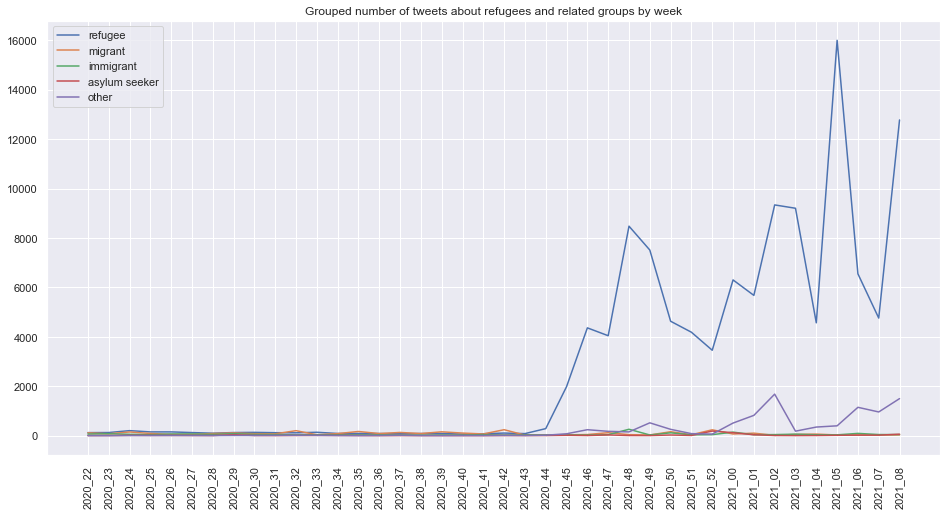

In [85]:
plot_event_timeline(df_tweets_tigray,"week")

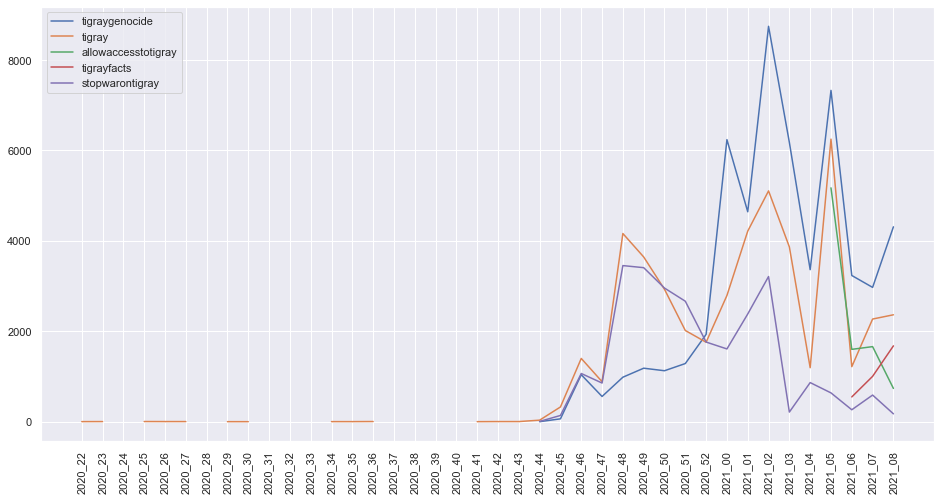

,tigraygenocide,tigray,allowaccesstotigray,tigrayfacts,stopwarontigray
2020_22,NaN,1.0,NaN,NaN,NaN
2020_23,NaN,2.0,NaN,NaN,NaN
2020_24,NaN,NaN,NaN,NaN,NaN
2020_25,NaN,3.0,NaN,NaN,NaN
2020_26,NaN,2.0,NaN,NaN,NaN
2020_27,NaN,2.0,NaN,NaN,NaN
2020_28,NaN,NaN,NaN,NaN,NaN
2020_29,NaN,0.0,NaN,NaN,NaN
2020_30,NaN,0.0,NaN,NaN,NaN
2020_31,NaN,NaN,NaN,NaN,NaN


In [142]:
plot_entity_timeline(df_tweets_tigray, "week", tigray_hashtags_3[:5], "hashtags")

### Beirut Blast

#### Find all relevant hashtags

In [88]:
beirut_hashtags_1 = ["beirut","lebanon"]

In [89]:
df_tweets_beirut_1 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,beirut_hashtags_1))]
df_tweets_beirut_1.shape

(6021, 23)

In [90]:
hashtag_count = get_entity_count(df_tweets_beirut_1["hashtags"])

# Remove hashtags that are already in list
for hashtag in beirut_hashtags_1:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('refugees', 1237),
 ('syria', 965),
 ('azerbaijani', 464),
 ('syrian', 420),
 ('covid19', 401),
 ('refugee', 384),
 ('armenia', 293),
 ('civilians', 265),
 ('jordan', 255),
 ('palestinian', 206),
 ('palestine', 201),
 ('shelling', 198),
 ('beirutblast', 188),
 ('beirutexplosion', 183),
 ('pkk', 175),
 ('turkey', 140),
 ('lebanese', 120),
 ('iraq', 109),
 ('migrants', 98),
 ('coronavirus', 97),
 ('kafala', 94),
 ('israel', 88),
 ('cyprus', 83),
 ('yemen', 79),
 ('unhcr', 78)]

In [91]:
beirut_hashtags_2 = beirut_hashtags_1 + ["beirutblast","beirutexplosion","lebanese"]

In [92]:
df_tweets_beirut_2 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,beirut_hashtags_2))]
df_tweets_beirut_2.shape

(6545, 23)

In [93]:
hashtag_count = get_entity_count(df_tweets_beirut_2["hashtags"])

# Remove hashtags that are already in list
for hashtag in beirut_hashtags_2:
    hashtag_count.pop(hashtag)

# Sort hashtags by frequency
hashtag_count_sorted = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)
hashtag_count_sorted[:25]

[('refugees', 1305),
 ('syria', 980),
 ('azerbaijani', 464),
 ('syrian', 462),
 ('covid19', 424),
 ('refugee', 396),
 ('armenia', 295),
 ('civilians', 265),
 ('jordan', 255),
 ('palestinian', 220),
 ('palestine', 204),
 ('shelling', 198),
 ('pkk', 175),
 ('turkey', 141),
 ('iraq', 110),
 ('migrants', 109),
 ('coronavirus', 103),
 ('kafala', 97),
 ('israel', 92),
 ('cyprus', 90),
 ('abolishkafala', 84),
 ('yemen', 81),
 ('unhcr', 79),
 ('لبنان', 79),
 ('education', 76)]

In [94]:
beirut_hashtags_3 = beirut_hashtags_2 + []

In [95]:
df_tweets_beirut_3 = df_tweets[df_tweets["hashtags"].apply(lambda x: element_in_list(x,beirut_hashtags_3))]
df_tweets_beirut_3.shape

(6545, 23)

In [96]:
beirut_hashtag_qualifier = beirut_hashtags_3

#### Create event qualifier

In [97]:
annotation_count = get_entity_count(df_tweets_beirut_3["annotations"])

# Sort hashtags by frequency
annotation_count_sorted = sorted(annotation_count.items(), key=lambda x: x[1], reverse=True)
annotation_count_sorted[:40]

[('lebanon', 973),
 ('beirut', 356),
 ('armenia', 134),
 ('syria', 117),
 ('syrian', 57),
 ('unrwa', 52),
 ('palestine', 51),
 ('israel', 48),
 ('unhcr', 39),
 ('allah', 38),
 ('un', 37),
 ('azerbaijani', 37),
 ('us', 35),
 ('azerbaijan', 33),
 ('syrians', 31),
 ('europe', 31),
 ('cyprus', 30),
 ('shatila', 28),
 ('eu', 28),
 ('tripoli', 28),
 ('arsal', 27),
 ('hezbollah', 25),
 ('bekaa valley', 24),
 ('uk', 23),
 ('god', 22),
 ('turkey', 19),
 ('bekaa', 18),
 ('canada', 18),
 ('middle east', 17),
 ('anera', 17),
 ('iran', 17),
 ('assad', 17),
 ('sabra', 16),
 ('france', 16),
 ('syrian refugee camp', 16),
 ('jordan', 15),
 ('covid', 14),
 ('hamas', 14),
 ('damascus', 13),
 ('sami', 13)]

In [98]:
mention_count = get_entity_count(df_tweets_beirut_3["mentions"])

# Sort hashtags by frequency
mention_count_sorted = sorted(mention_count.items(), key=lambda x: x[1], reverse=True)
mention_count_sorted[:40]

[('refugees', 225),
 ('un', 159),
 ('hrw', 148),
 ('nasimiaghayev', 122),
 ('cenkuygur', 116),
 ('anakasparian', 110),
 ('theyoungturks', 110),
 ('tytpolitics', 110),
 ('antonioguterres', 80),
 ('kenroth', 70),
 ('filippograndi', 68),
 ('unhcrlebanon', 67),
 ('unrwa', 64),
 ('coe', 63),
 ('ocse', 62),
 ('tytinvestigates', 58),
 ('aghavalyan', 56),
 ('tyt', 52),
 ('avillaraigosa', 52),
 ('unmigration', 43),
 ('rescueorg', 34),
 ('wfp', 29),
 ('unicef', 29),
 ('uniceflebanon', 27),
 ('basmehzeitooneh', 26),
 ('lacosheriff', 25),
 ('yasminesherif1', 23),
 ('arm_leb', 22),
 ('amnesty', 22),
 ('egnalegnadwu', 21),
 ('nrc_norway', 20),
 ('ajenglish', 19),
 ('who', 19),
 ('iomlebanon', 18),
 ('redcrosslebanon', 18),
 ('emmanuelmacron', 17),
 ('aya_majzoub', 16),
 ('amesegura', 14),
 ('opendemocracy', 14),
 ('hikmethajiyev', 14)]

In [99]:
beirut_event_qualifier = []

#### Create event dataset

In [100]:
beirut_qualifier = set(beirut_event_qualifier + beirut_hashtag_qualifier)

In [101]:
df_tweets_beirut = df_tweets[df_tweets["text_clean"].apply(lambda x: element_in_list(x.split(" "),beirut_qualifier))]

In [102]:
df_tweets_beirut.shape

(24237, 23)

#### Visualize event

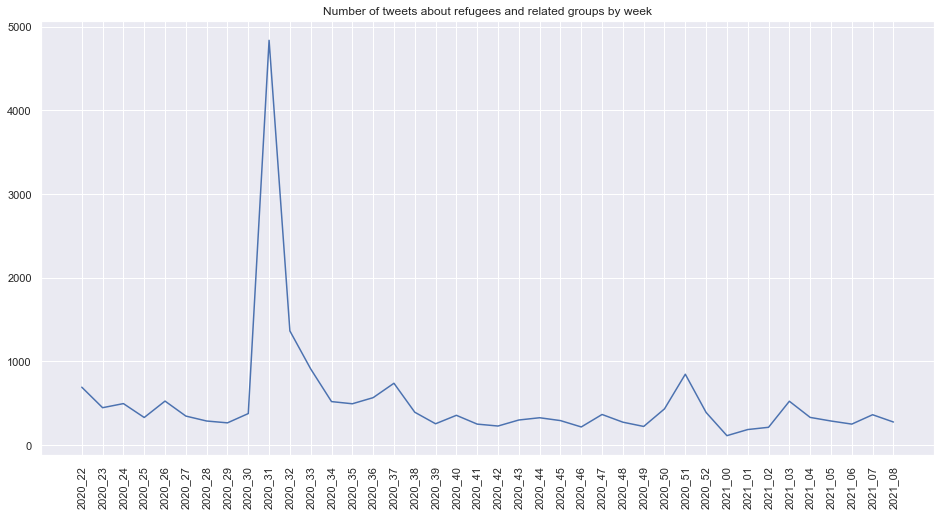

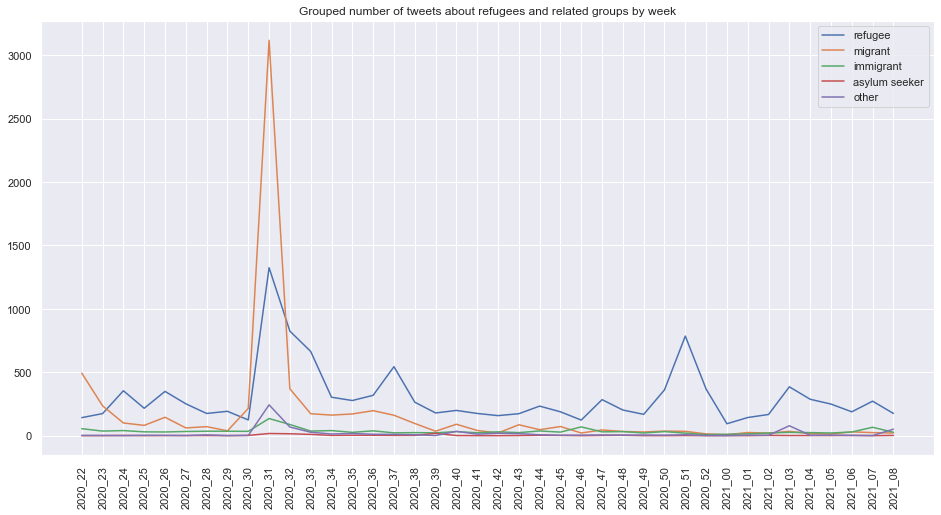

In [135]:
plot_event_timeline(df_tweets_beirut,"week")

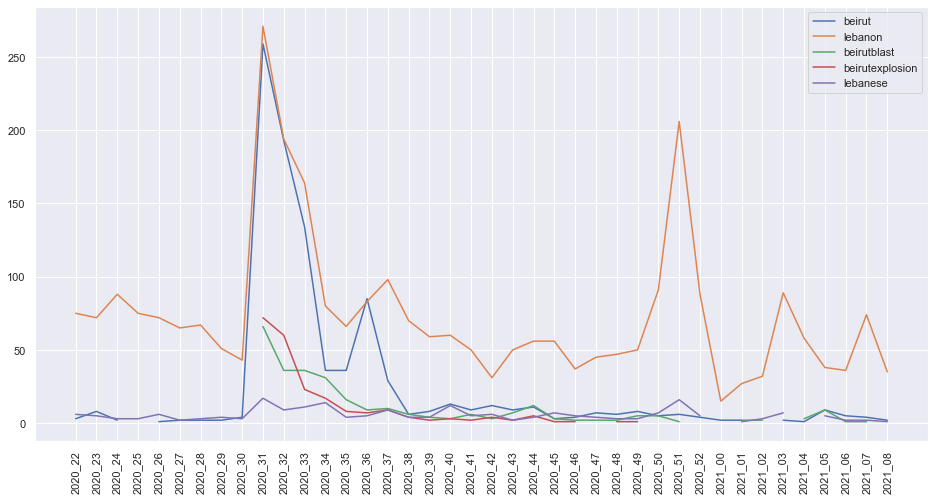

In [145]:
plot_entity_timeline(df_tweets_beirut, "week", beirut_hashtags_3[:5], "hashtags")